In [14]:
import krwordrank
#print(krwordrank.__version__)

import pandas as pd

def get_text_predicts(fname):
    dataset = pd.read_csv(fname, delimiter='\t')
    neg_texts = dataset.loc[dataset['prediction'] == 0]
    pos_texts = dataset.loc[dataset['prediction'] == 1]

    return list(neg_texts['text']), list(pos_texts['text'])

# Comments data
fname = '../data/predicted_data/nsmc_youtube_review_test.tsv'

neg_texts, pos_texts = get_text_predicts(fname)

In [15]:
import sys
sys.path.append('../')

from krwordrank.word import KRWordRank
import krwordrank

In [16]:
neg_wordrank_extractor = KRWordRank(
    min_count = 5, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

neg_keywords, neg_rank, neg_graph = neg_wordrank_extractor.extract(neg_texts, beta, max_iter, num_keywords=100)

scan vocabs ... 
num vocabs = 289
done


In [17]:
pos_wordrank_extractor = KRWordRank(
    min_count = 5, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

pos_keywords, pos_rank, pos_graph = pos_wordrank_extractor.extract(pos_texts, beta, max_iter, num_keywords=100)

scan vocabs ... 
num vocabs = 490
done


In [18]:
for word, r in sorted(neg_keywords.items(), key=lambda x:x[1], reverse=True)[:50]:
    print('%8s:\t%.4f' % (word, r))

     런민기:	4.1329
      무슨:	3.7466
     카러플:	3.6175
      잘못:	3.0597
      영상:	2.7246
     민기님:	2.5406
      아니:	2.5093
      근데:	2.4669
     이렇게:	2.1823
      사과:	2.1772
      진짜:	1.7570
    잼민이들:	1.6623
     켜져있:	1.4149
      댓글:	1.3817
      자숙:	1.2638
     실수가:	1.2468
      이제:	1.2025
      카트:	1.1938
      일이:	1.1835
      반성:	1.1402
      있었:	1.0655
     오른쪽:	1.0636
     뒷광고:	0.9904
      있는:	0.9701
      그래:	0.9560
      복귀:	0.9333
      방송:	0.8958
     유튜버:	0.8859
      뒤에:	0.8750
      계속:	0.8431
      힘내:	0.8090
      하는:	0.7979
     메이플:	0.7188
      하지:	0.6907
      사람:	0.6716
     이영상:	0.6410
      다시:	0.6391
      해주:	0.6356
      안하:	0.5878
      이런:	0.5846
      그러:	0.5643
     시청자:	0.5508
      이러:	0.5139
     모르겠:	0.5096
      애들:	0.4940
      얼굴:	0.4934
      그렇:	0.4737
      구독:	0.4723
      프메:	0.4092
      뭔일:	0.4073


In [19]:
# remove stopwords

stopwords = {'다시', '사과', '반성', '힘내', '복귀', '카러플', '방송', '하는', '이런', '이제', '민기님', '이렇게', '영상', '진짜', '런민기'}
neg_passwords = {word:score for word, score in sorted(
    neg_keywords.items(), key=lambda x:-x[1])[:300] if not (word in stopwords)}

print('neg num passwords = {}'.format(len(neg_passwords)))

pos_passwords = {word:score for word, score in sorted(
    pos_keywords.items(), key=lambda x:-x[1])[:300] if not (word in stopwords)}

print('pos num passwords = {}'.format(len(pos_passwords)))

neg num passwords = 40
pos num passwords = 76


In [20]:
# draw word cloud using generate_from_frequencies()
# You should set font path for Korean.

from wordcloud import WordCloud

# Set your font path
font_path = '../font/NanumBarunGothic.ttf'

neg_krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

neg_krwordrank_cloud = neg_krwordrank_cloud.generate_from_frequencies(neg_passwords)

pos_krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)
pos_krwordrank_cloud = pos_krwordrank_cloud.generate_from_frequencies(pos_passwords)

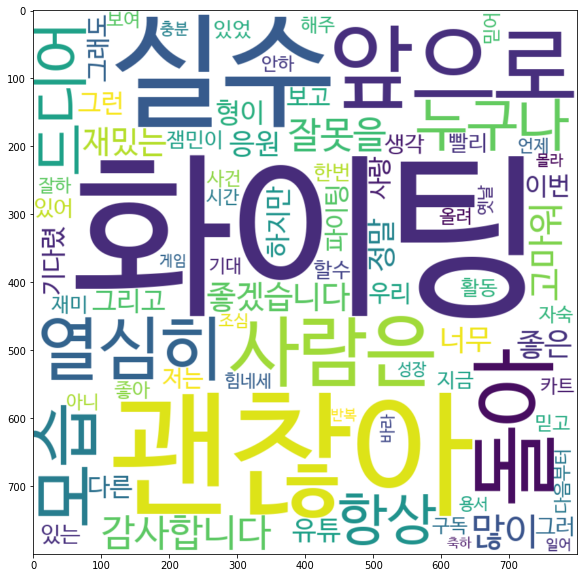

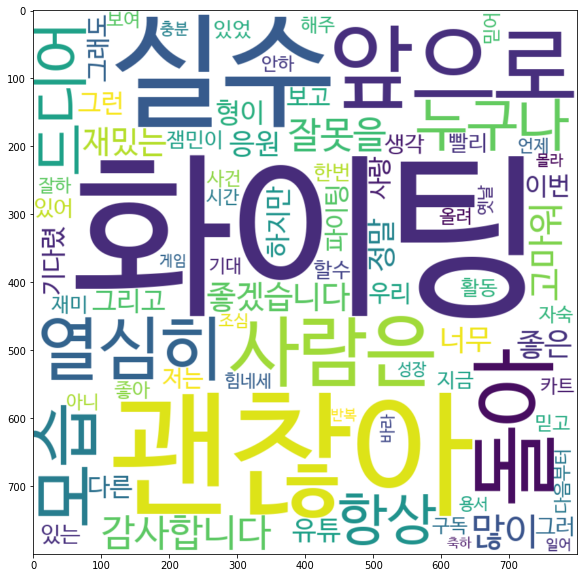

In [21]:
# show figure using matplotlib

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(neg_krwordrank_cloud, interpolation="bilinear")
plt.show()
fig.savefig('./neg_wordcloud.png')

fig = plt.figure(figsize=(10, 10))
plt.imshow(pos_krwordrank_cloud, interpolation="bilinear")
plt.show()
fig.savefig('./pos_wordcloud.png')

In [22]:
# save figure

fig.savefig('./neg_wordcloud.png')